In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [2]:
df=pd.read_csv('time-series-19-covid-combined_csv.csv') ## get the data into a dataframe from the csv file

In [3]:
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,1/22/20,Afghanistan,NaN,33.0,65.0,0,0.0,0
1,1/23/20,Afghanistan,NaN,33.0,65.0,0,0.0,0
2,1/24/20,Afghanistan,NaN,33.0,65.0,0,0.0,0
3,1/25/20,Afghanistan,NaN,33.0,65.0,0,0.0,0
4,1/26/20,Afghanistan,NaN,33.0,65.0,0,0.0,0


In [4]:
df.shape ## get the number of rows & columns 

(14632, 8)

In [5]:
df.head(14756)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,1/22/20,Afghanistan,NaN,33.0000,65.0000,0,0.0,0
1,1/23/20,Afghanistan,NaN,33.0000,65.0000,0,0.0,0
2,1/24/20,Afghanistan,NaN,33.0000,65.0000,0,0.0,0
3,1/25/20,Afghanistan,NaN,33.0000,65.0000,0,0.0,0
4,1/26/20,Afghanistan,NaN,33.0000,65.0000,0,0.0,0
...,...,...,...,...,...,...,...,...
14627,3/19/20,Belize,NaN,13.1939,-59.5432,0,NaN,0
14628,3/20/20,Belize,NaN,13.1939,-59.5432,0,NaN,0
14629,3/21/20,Belize,NaN,13.1939,-59.5432,0,NaN,0
14630,3/22/20,Belize,NaN,13.1939,-59.5432,0,NaN,0


In [6]:
df.describe() ## some statistics

,Lat,Long,Confirmed,Recovered,Deaths
count,14632.000000,14632.000000,14632.000000,14012.000000,14632.000000
mean,22.187318,25.549175,379.287794,140.625963,13.570804
std,24.644875,70.791972,3820.237046,2100.868888,180.343477
min,-41.454500,-123.120700,0.000000,0.000000,0.000000
25%,8.390125,-14.666825,0.000000,0.000000,0.000000
50%,25.004150,21.758700,0.000000,0.000000,0.000000
75%,41.435275,88.569300,16.000000,1.000000,0.000000
max,71.706900,178.065000,67800.000000,59879.000000,6077.000000


In [7]:
df=df.drop_duplicates() ## removing any duplicates (if any) 
df=df.reset_index(drop=True) ## Reset the indices if duplicates were found

In [8]:
df.shape

(14632, 8)

In [9]:
df.isnull() ## Get where there are missing values 

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
14627,False,False,True,False,False,False,True,False
14628,False,False,True,False,False,False,True,False
14629,False,False,True,False,False,False,True,False
14630,False,False,True,False,False,False,True,False


In [10]:
df=df.interpolate() ## interpolate what can be interpolated (i.e., "Recovered")
df['Province/State'].fillna('Not Applicable', inplace=True) ## Fill missing values in the state column by "Not Applicable"

In [11]:
df.isnull() ## check if replacment was successful 

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
14627,False,False,False,False,False,False,False,False
14628,False,False,False,False,False,False,False,False
14629,False,False,False,False,False,False,False,False
14630,False,False,False,False,False,False,False,False


In [12]:

import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


country_name = 'United States'
print(country_to_continent(country_name))

i=5146
while i < 5270:
    df.iloc[i,1]='Congo'
    i += 1

df.iloc[5335,1]


i=5332
while i < 5394:
    df.iloc[i,1]='Ivory Coast'
    i += 1



i=7812
while i < 7874:
    df.iloc[i,1]='Italy'
    i += 1
    
i=8804
while i < 8866:
    df.iloc[i,1]='South Korea'
    i += 1


i=12772
while i < 12834:
    df.iloc[i,1]='Taiwan'
    i += 1


i=13888
while i < 13950:
    df.iloc[i,1]='United States'
    i += 1



North America


In [13]:
mylist = []

for index, row in df.iterrows():
    mylist += [country_to_continent(row['Country/Region'])]


In [14]:
df=df.reset_index(drop=True)


In [15]:
df['Continent'] = mylist

In [16]:
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Continent
0,1/22/20,Afghanistan,Not Applicable,33.0000,65.0000,0,0.0,0,Asia
1,1/23/20,Afghanistan,Not Applicable,33.0000,65.0000,0,0.0,0,Asia
2,1/24/20,Afghanistan,Not Applicable,33.0000,65.0000,0,0.0,0,Asia
3,1/25/20,Afghanistan,Not Applicable,33.0000,65.0000,0,0.0,0,Asia
4,1/26/20,Afghanistan,Not Applicable,33.0000,65.0000,0,0.0,0,Asia
...,...,...,...,...,...,...,...,...,...
14627,3/19/20,Belize,Not Applicable,13.1939,-59.5432,0,0.0,0,North America
14628,3/20/20,Belize,Not Applicable,13.1939,-59.5432,0,0.0,0,North America
14629,3/21/20,Belize,Not Applicable,13.1939,-59.5432,0,0.0,0,North America
14630,3/22/20,Belize,Not Applicable,13.1939,-59.5432,0,0.0,0,North America


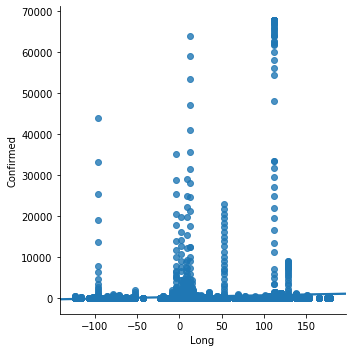

In [17]:
ax = sns.lmplot(x = 'Long', y = 'Confirmed', data = df)

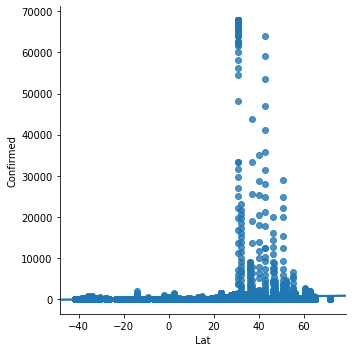

In [18]:
ax2 = sns.lmplot(x = 'Lat', y = 'Confirmed', data = df)

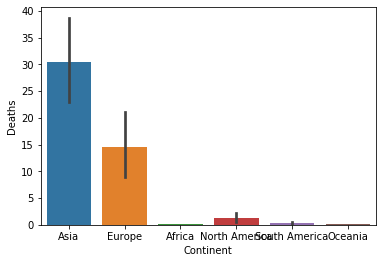

In [19]:
df2 = sns.barplot(x = 'Continent', y = 'Deaths', data = df)

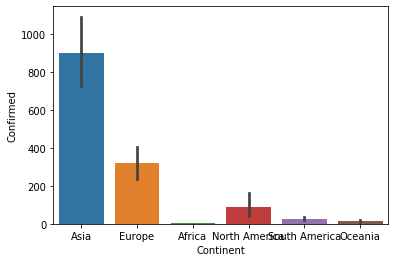

In [20]:
df3 = sns.barplot(x = 'Continent', y = 'Confirmed', data = df)

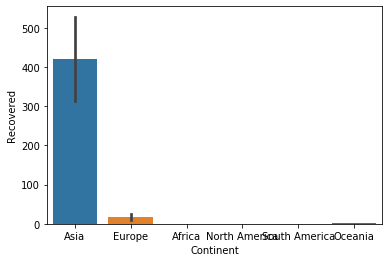

In [21]:
df4 = sns.barplot(x = 'Continent', y = 'Recovered', data = df)

In [22]:
china_canada = df.loc[df['Country/Region'].isin(['China', 'Canada'])]
china_canada

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Continent
2170,1/22/20,Canada,Alberta,53.9333,-116.5765,0,0.0,0,North America
2171,1/23/20,Canada,Alberta,53.9333,-116.5765,0,0.0,0,North America
2172,1/24/20,Canada,Alberta,53.9333,-116.5765,0,0.0,0,North America
2173,1/25/20,Canada,Alberta,53.9333,-116.5765,0,0.0,0,North America
2174,1/26/20,Canada,Alberta,53.9333,-116.5765,0,0.0,0,North America
...,...,...,...,...,...,...,...,...,...
14317,3/19/20,Canada,Diamond Princess,0.0000,0.0000,0,0.0,0,North America
14318,3/20/20,Canada,Diamond Princess,0.0000,0.0000,0,0.0,0,North America
14319,3/21/20,Canada,Diamond Princess,0.0000,0.0000,0,0.0,0,North America
14320,3/22/20,Canada,Diamond Princess,0.0000,0.0000,0,0.0,1,North America


In [23]:
# Test/Train data ML

target = china_canada['Province/State']
features = china_canada[['Confirmed','Deaths','Lat']]

y = target.values
X = features.values
seed = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)


In [24]:
print(X.shape)

(2790, 3)


In [25]:
print(y.shape)

(2790,)


In [26]:
print(X_test.shape)

(558, 3)


In [27]:
print(y_test.shape)

(558,)


In [28]:
# Report accuracy of KNN model
knn3 = KNeighborsClassifier(n_neighbors = 2)
knn3.fit(X_train,y_train)
preds = knn3.predict(X_test)
accuracy_score(y_true = y_test, y_pred = preds)

0.7078853046594982

In [29]:
matrix = confusion_matrix(y_test, preds)
print(matrix)

[[15  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  1  0 ...  0  0  9]]


In [30]:
report = classification_report(y_test, preds)
print(report)

                           precision    recall  f1-score   support

                  Alberta       0.88      0.88      0.88        17
                    Anhui       0.27      0.40      0.32        10
                  Beijing       0.44      0.54      0.48        13
         British Columbia       0.46      0.67      0.55         9
                Chongqing       0.35      0.89      0.50         9
         Diamond Princess       1.00      1.00      1.00        13
                   Fujian       0.43      0.82      0.56        11
                    Gansu       0.60      0.75      0.67        12
           Grand Princess       0.82      1.00      0.90        14
                Guangdong       0.35      0.67      0.46         9
                  Guangxi       0.68      0.76      0.72        17
                  Guizhou       0.75      0.69      0.72        13
                   Hainan       0.75      0.82      0.78        11
                    Hebei       0.82      0.75      0.78     

In [31]:
n = list(range(1,10))
score = []
for i in n:
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(X_train, y_train)
    p = k.predict(X_test)
    score.append(accuracy_score(y_true = y_test, y_pred = p))
score

[0.7275985663082437,
 0.7078853046594982,
 0.7060931899641577,
 0.7060931899641577,
 0.6845878136200717,
 0.6989247311827957,
 0.6917562724014337,
 0.6881720430107527,
 0.6899641577060932]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

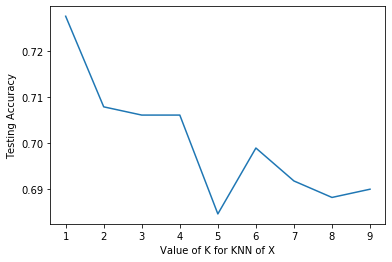

In [32]:
plt.plot(n, score)
plt.xlabel('Value of K for KNN of X')
plt.ylabel('Testing Accuracy')
plt.plot

In [33]:
cc1 = china_canada.sort_values(["Lat", "Confirmed"], ascending = (True, True))
cc1 = cc1[cc1['Date'] == "3/23/20"] ##peak of current data
cc1=cc1.reset_index(drop=True)
del cc1['Long']
del cc1['Continent']
del cc1['Deaths']
del cc1['Recovered']
cc1 = cc1.drop(cc1.index[14]) ##deleting outliers (Wuhan)
cc1=cc1.reset_index(drop=True)
cc1

,Date,Country/Region,Province/State,Lat,Confirmed
0,3/23/20,Canada,Diamond Princess,0.0000,0
1,3/23/20,China,Hainan,19.1959,168
2,3/23/20,China,Macau,22.1667,24
3,3/23/20,China,Hong Kong,22.3000,356
4,3/23/20,China,Guangdong,23.3417,1415
5,3/23/20,China,Guangxi,23.8298,254
6,3/23/20,China,Yunnan,24.9740,176
7,3/23/20,China,Fujian,26.0789,313
8,3/23/20,China,Guizhou,26.8154,146
9,3/23/20,China,Hunan,27.6104,1018


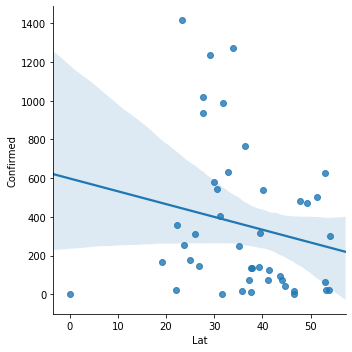

In [34]:
sns.lmplot(x='Lat',y='Confirmed',data=cc1,fit_reg=True) 

In [35]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(cc1)

       Date Country/Region             Province/State      Lat  Confirmed
0   3/23/20         Canada           Diamond Princess   0.0000          0
1   3/23/20          China                     Hainan  19.1959        168
2   3/23/20          China                      Macau  22.1667         24
3   3/23/20          China                  Hong Kong  22.3000        356
4   3/23/20          China                  Guangdong  23.3417       1415
5   3/23/20          China                    Guangxi  23.8298        254
6   3/23/20          China                     Yunnan  24.9740        176
7   3/23/20          China                     Fujian  26.0789        313
8   3/23/20          China                    Guizhou  26.8154        146
9   3/23/20          China                      Hunan  27.6104       1018
10  3/23/20          China                    Jiangxi  27.6140        936
11  3/23/20          China                   Zhejiang  29.1832       1238
12  3/23/20          China            